# Project Report

Group 20 (Lucasports):

Benjamin Wang, I-Kai Teng, Yu-Hsi Chen, Po-Hsun Chiu

### Project Overview <a id='section_id2'></a>

**Introduction**

The goal of this project is to process the NBA dataset, clean, interpret, analyze, visualize the data, making prediction and regression analysis. Dataset includes the NBA data of each game from 2004 to 03/01/2020, all statistics of players for a given game and detail such as player performance, played time and seasonal team record. 
 
NBA is usually considered to be the most renowned men's professional basketball league in the world, average regular season viewers reached 2 million and more than 20 million viewers for final games. Exploring NBA dataset could help us find hidden insights and matchup predictions for the team, or identify under-valued players and underdog teams. For instance, in 2017, some NBA teams used data analysis to discover that by scoring more three-point shots will lead to a higher winning probability, such insights made average three-point shots rate increased by more than 40% in 2017. Using such analysis and prediction could systematically help a team to find out the most efficient way of scoring, providing more winning chances for a team, that’s the reason why data analytics is important for NBA. 
 
 
Since NBA has suspended all games including playoffs due to the pandemic, we will now use all available data of 19-20 regular season to predict our target of interest. Our goals including making analysis or predictions. First, we will analyze the performance of players and teams. In terms of performance, we will calculate each player’s efficiency, which is the most common benchmark teams used for rating player performance. More detail of EFF and its formula could be explored here: https://en.wikipedia.org/wiki/Efficiency_(basketball)


After creating EFF, we could compare the performance and salary to find out who earned millions but wasn’t contributing to the team, identifying the overpaid underperformers, players who perform weakly or have injury issue. 
We can also Predict MVP of the year, the most valued player usually will be the best player in the final winning team, and will be voted and chosen by media. To achieve predicting MVP, we could use current data to find which potential team is most likely to be in the final match and which statistics of performance is the best. We will also predict Rookie of the year, a best first-season player will be selected by sports reporters. We can first identify all first-season player in 19-20 season then compare their performance statistics. Also, the most importantly, predict which team will win the annual NBA championship. We will use performance of regular season to predict which team is the top eight seed in each conference to make the playoffs. Then predict each match up in playoffs to the final. 
 
 
Since the 19-20 season only completed about 90% of regular season, we do not have any 19-20 playoffs data. Therefore, in terms of training model to predict our question of interest, we will only use regular season data. For example, we will use 2010-2018 regular season team performance as x, the independent variable, and teams who enter playoffs will be y, target variable. When training model to predict other results such as champion and MVP, will only use regular season data as well.
 
 
 

### Dataset overview <a id='section_id2'></a>


The dataset was collected from [https://www.kaggle.com/nathanlauga/nba-games](https://www.kaggle.com/nathanlauga/nba-games)

The dataset contains 5 data:

games: all match details from 2004 to 2020  
games_details: details of games, all statistics of players for a given game
<br>players: players details
<br>ranking: ranking of NBA given a day
<br>teams: all NBA teams detail such as city, coach, owner


### Data Acquisition and Cleaning


First, we will clean the datasets using merging, grouping, and filtering, or using Regex to extract and transfom data.

In [0]:
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn import metrics
import matplotlib.pyplot as plt

In [0]:
#data acquisition
url = "https://raw.githubusercontent.com/KyleTe/NBA_games/master/"
games = pd.read_csv(url+"games.csv")
games_details = pd.read_csv(url+"games_details.csv")
players = pd.read_csv(url+"players.csv")
ranking = pd.read_csv(url+"ranking.csv")
teams = pd.read_csv(url+"teams.csv")

Merge and group data to create teams statistics in season 2019-2020.

In [0]:
#ignore future warning
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Merge the data (adding team name to other data)
team_name = teams[['TEAM_ID', 'NICKNAME']]
games = pd.merge(games,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
ranking = pd.merge(ranking, team_name, on='TEAM_ID')

In [0]:
#merge games & games_detail dataset
games_s19 = games[games['SEASON'] == 2019]['GAME_ID']
games_details_s19 = games_details[games_details.GAME_ID.isin(games_s19)]

In [0]:
#Convert 'MIN' from object to float
mymin = pd.to_numeric(games_details['MIN'].str.split(':', expand=True)[0])
mysec = (pd.to_numeric(games_details['MIN'].str.split(':', expand=True)[1]).fillna(0)) / 60
games_details['MIN'] = mymin + mysec

#Use the data in only season 2019
games_s19 = games[games['SEASON'] == 2019]['GAME_ID']
games_details_s19 = games_details[games_details.GAME_ID.isin(games_s19)]

#Filter the column we need
player_statistics = games_details_s19.groupby(by = 'PLAYER_NAME', as_index=False)['MIN','REB','AST','STL','BLK','PTS'].mean();

Team stastistics from season 2010 to 2019.

In [0]:
#convert team id to string
games.iloc[:,3:5] = games.iloc[:,3:5].astype(str)

#retrieve data of 2018-19 regular season
team_2018_pre = games[(games['GAME_ID'] <= 21801230) & (games['GAME_ID'] >= 21800001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
team_2017_pre = games[(games['GAME_ID'] <= 21701230) & (games['GAME_ID'] >= 21700001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
team_2016_pre = games[(games['GAME_ID'] <= 21601230) & (games['GAME_ID'] >= 21600001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
team_2015_pre = games[(games['GAME_ID'] <= 21501230) & (games['GAME_ID'] >= 21500001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
team_2014_pre = games[(games['GAME_ID'] <= 21401230) & (games['GAME_ID'] >= 21400001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
team_2013_pre = games[(games['GAME_ID'] <= 21301230) & (games['GAME_ID'] >= 21300001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
team_2012_pre = games[(games['GAME_ID'] <= 21201230) & (games['GAME_ID'] >= 21200001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
team_2011_pre = games[(games['GAME_ID'] <= 21101230) & (games['GAME_ID'] >= 21100001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
team_2010_pre = games[(games['GAME_ID'] <= 21001230) & (games['GAME_ID'] >= 21000001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)


#create away team win data 
team_2018_pre['AWAY_TEAM_WINS'] = team_2018_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
team_2017_pre['AWAY_TEAM_WINS'] = team_2017_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
team_2016_pre['AWAY_TEAM_WINS'] = team_2016_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
team_2015_pre['AWAY_TEAM_WINS'] = team_2015_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
team_2014_pre['AWAY_TEAM_WINS'] = team_2014_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
team_2013_pre['AWAY_TEAM_WINS'] = team_2013_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
team_2012_pre['AWAY_TEAM_WINS'] = team_2012_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
team_2011_pre['AWAY_TEAM_WINS'] = team_2011_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
team_2010_pre['AWAY_TEAM_WINS'] = team_2010_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)


#group by data by home and away
home_2018_pre = team_2018_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2018_pre = team_2018_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

home_2017_pre = team_2017_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2017_pre = team_2017_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

home_2016_pre = team_2016_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2016_pre = team_2016_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

home_2015_pre = team_2015_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2015_pre = team_2015_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

home_2014_pre = team_2014_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2014_pre = team_2014_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

home_2013_pre = team_2013_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2013_pre = team_2013_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

home_2012_pre = team_2012_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2012_pre = team_2012_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

home_2011_pre = team_2011_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2011_pre = team_2011_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

home_2010_pre = team_2010_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2010_pre = team_2010_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]

#rename the columns
colname_stat =  ['PTS', 'FG_PCT','FT_PCT','FG3_PCT','AST','REB','WINRATE']
home_2018_pre.columns = away_2018_pre.columns = home_2017_pre.columns = away_2017_pre.columns = colname_stat
home_2016_pre.columns = away_2016_pre.columns = colname_stat
home_2015_pre.columns = away_2015_pre.columns = colname_stat
home_2014_pre.columns = away_2014_pre.columns = colname_stat
home_2013_pre.columns = away_2013_pre.columns = colname_stat
home_2012_pre.columns = away_2012_pre.columns = colname_stat
home_2011_pre.columns = away_2011_pre.columns = colname_stat
home_2010_pre.columns = away_2010_pre.columns = colname_stat


#home/away winrate difference
home_2018_pre['WINRATE']-away_2018_pre['WINRATE']

# regular season overall stats group by team
stats_2018_pre = (home_2018_pre + away_2018_pre)/2
stats_2017_pre = (home_2017_pre + away_2017_pre)/2
stats_2016_pre = (home_2016_pre + away_2016_pre)/2
stats_2015_pre = (home_2015_pre + away_2015_pre)/2
stats_2014_pre = (home_2014_pre + away_2014_pre)/2
stats_2013_pre = (home_2013_pre + away_2013_pre)/2
stats_2012_pre = (home_2012_pre + away_2012_pre)/2
stats_2011_pre = (home_2011_pre + away_2011_pre)/2
stats_2010_pre = (home_2010_pre + away_2010_pre)/2

# convert teamid to string
team_name['TEAM_ID'] = team_name['TEAM_ID'].astype(str)

#merge data with team name
stats_2018_pre = pd.merge(stats_2018_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
stats_2017_pre = pd.merge(stats_2017_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
stats_2016_pre = pd.merge(stats_2016_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
stats_2015_pre = pd.merge(stats_2015_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
stats_2014_pre = pd.merge(stats_2014_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
stats_2013_pre = pd.merge(stats_2013_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
stats_2012_pre = pd.merge(stats_2012_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
stats_2011_pre = pd.merge(stats_2011_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')
stats_2010_pre = pd.merge(stats_2010_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')



In [0]:
#create testing data of 2019 regular season
team_2019_pre = games[(games['GAME_ID'] <= 21900901) & (games['GAME_ID'] >= 21900001)].sort_values(by='GAME_ID', ascending = False).reset_index(drop=True)
#create away team win data 
team_2019_pre['AWAY_TEAM_WINS'] = team_2019_pre['HOME_TEAM_WINS'].map(lambda x: 0 if x==1 else 1)
#groupby data by home and away
home_2019_pre = team_2019_pre.groupby(by = 'HOME_TEAM_ID').mean().iloc[:,np.r_[3:9,16]]
away_2019_pre = team_2019_pre.groupby(by = 'VISITOR_TEAM_ID').mean().iloc[:,np.r_[10:16,18]]
#rename columns
home_2019_pre.columns = away_2019_pre.columns = colname_stat

# regular season overall stats group by team
stats_2019_pre = (home_2019_pre + away_2019_pre)/2
#merge data with team name
stats_2019_pre = pd.merge(stats_2019_pre,team_name, left_on='HOME_TEAM_ID', right_on='TEAM_ID')

#normalization
stats_2019_pre['PTS'] = minmax_scale(stats_2019_pre['PTS'], feature_range=(0,1))
stats_2019_pre['AST'] = minmax_scale(stats_2019_pre['AST'], feature_range=(0,1))
stats_2019_pre['REB'] = minmax_scale(stats_2019_pre['REB'], feature_range=(0,1))
stats_2019_pre =stats_2019_pre.iloc[:,np.r_[7,8,0:7]]
stats_2019_pre.head()

,TEAM_ID,NICKNAME,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WINRATE
0,1610612737,Hawks,0.538468,0.451129,0.789629,0.331419,0.546496,0.108836,0.306452
1,1610612738,Celtics,0.647477,0.463636,0.803641,0.367448,0.436370,0.399428,0.696552
2,1610612739,Cavaliers,0.247249,0.457781,0.760025,0.345377,0.377404,0.228132,0.283482
3,1610612740,Pelicans,0.784936,0.463683,0.731783,0.374100,0.958251,0.475433,0.433333
4,1610612741,Bulls,0.274451,0.447284,0.754379,0.350316,0.450138,0.000000,0.331479


### Analysis of Player's statistics and other information 


We created a player statistics ranking by average points, but there is a better benchmark to evaluate players, which is EFF. 

In [0]:
#Order by points
player_statistics.sort_values('PTS', ascending=False).reset_index(drop=True).head(10)

,PLAYER_NAME,MIN,REB,AST,STL,BLK,PTS
0,James Harden,36.276776,6.311475,7.344262,1.721311,0.868852,34.950820
1,Giannis Antetokounmpo,30.502632,13.701754,5.684211,1.052632,1.070175,29.789474
2,Bradley Beal,34.640476,4.214286,5.857143,1.160714,0.357143,29.267857
3,Damian Lillard,36.319006,4.298246,7.701754,0.929825,0.350877,28.807018
4,Trae Young,34.607377,4.393443,9.180328,1.098361,0.131148,28.754098
5,Luka Doncic,32.323718,9.442308,8.403846,1.038462,0.192308,27.980769
6,Russell Westbrook,35.236164,7.566038,6.962264,1.698113,0.320755,26.735849
7,Kawhi Leonard,31.687415,7.285714,5.122449,1.857143,0.591837,26.326531
8,Kyrie Irving,31.090909,4.818182,6.000000,1.318182,0.454545,25.772727
9,Karl-Anthony Towns,32.862393,10.384615,4.333333,0.974359,1.256410,25.717949


**Creating EFF for each players**

EFF formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP

The Efficiency, the most commonly used statistical benchmark for comparing the overall value of players, accounts for both a player's offensive contributions (points, assists) and their defensive contributions (steals, blocks)

(From: [Wikipedia: EFF](https://en.wikipedia.org/wiki/Efficiency_(basketball)))



In [0]:
#retrieve data we need from previous created df
player_per= games_details_s19.groupby(by = 'PLAYER_NAME', as_index=False)['PTS','REB','AST','STL','BLK','FGA','FGM','FTA','FTM','TO'].mean()
#calculate EFF
player_per['EFF'] = (player_per['PTS']+player_per['REB']+player_per['AST']+player_per['STL']+player_per['BLK'])-(player_per['FGA']-player_per['FGM'])-(player_per['FTA']-player_per['FTM']) - player_per['TO']
#ranking players by EFF
player_per.sort_values(by='EFF',ascending=False).head(5)

,PLAYER_NAME,PTS,REB,AST,STL,BLK,FGA,FGM,FTA,FTM,TO,EFF
212,Giannis Antetokounmpo,29.789474,13.701754,5.684211,1.052632,1.070175,19.754386,11.000000,10.017544,6.315789,3.649123,35.192982
263,James Harden,34.950820,6.311475,7.344262,1.721311,0.868852,22.819672,10.098361,11.819672,10.131148,4.377049,32.409836
344,Karl-Anthony Towns,25.717949,10.384615,4.333333,0.974359,1.256410,17.205128,8.769231,6.179487,4.974359,3.076923,29.948718
401,Luka Doncic,27.980769,9.442308,8.403846,1.038462,0.192308,19.788462,9.115385,8.980769,6.865385,4.346154,29.923077
29,Anthony Davis,25.381818,9.181818,3.290909,1.454545,2.436364,17.363636,8.781818,8.072727,6.781818,2.418182,29.454545


Before calculated EFF, we could only rank players by defensive or offensive performance, but now we could have a clearer view of player performace since EFF counting offensive, defense, and mistakes (Turnover and missed shots).

We're also interested in other player information such as body measurement.

In [0]:
#import more player detail such as height and weight
#data was downloaded from 
player_bio = pd.read_csv(url+"all_seasons.csv")

#Select player info within season 20-19
player_bio = player_bio[["PLAYER_NAME","age","player_height","player_weight","season"]]
player_bio = player_bio[player_bio["season"] == "2019-20"]
player_bio = player_bio.sort_values(by='PLAYER_NAME', ascending=True).drop(['season'], axis=1)

#Merge data
player_w_h=pd.merge(players[players['SEASON']==2019],player_bio,left_on='PLAYER_NAME',right_on='PLAYER_NAME',how='inner')
team_name['TEAM_ID'] = team_name['TEAM_ID'].astype(int)
player_w_h_2=pd.merge(player_w_h,team_name,left_on='TEAM_ID',right_on='TEAM_ID',how='inner')

#BMI=Weight(kg)/height(m)**2
temp_weight=pd.DataFrame(player_w_h_2.groupby('NICKNAME')['player_weight'].mean().sort_values(ascending=False))
temp_height=pd.DataFrame(player_w_h_2.groupby('NICKNAME')['player_height'].mean().sort_values(ascending=False))
temp_weight_height=pd.merge(temp_weight,temp_height,on='NICKNAME',how='inner')
temp_weight_height['player_height']=temp_weight_height['player_height'] 

#BMI=Weight(kg)/height(m)**2
temp_weight_height['BMI']=temp_weight_height['player_weight']/(temp_weight_height['player_height']/100) ** 2
temp_weight_height.sort_values('BMI', ascending=False).head(10)


,player_weight,player_height,BMI
NICKNAME,,,
Celtics,101.730606,197.555556,26.065925
Bucks,102.058200,199.315294,25.690151
Cavaliers,100.697424,198.402222,25.581458
Rockets,97.947523,196.056250,25.481916
Jazz,99.217282,197.451579,25.448729
Pelicans,98.826357,197.326250,25.380669
Hornets,99.506745,199.072500,25.109033
Knicks,98.145969,197.961250,25.044484
Lakers,98.656260,198.596250,25.013966


In [0]:
player_bio['age'].describe()[1:]

mean    25.573930
std      4.032444
min     19.000000
25%     22.000000
50%     25.000000
75%     28.000000
max     43.000000
Name: age, dtype: float64

In [0]:
print("Avg NBA Player's Height:",temp_weight_height['player_height'].mean())
print("Avg NBA Player's Weight:",temp_weight_height['player_weight'].mean())
print("Avg NBA Player's BMI:",temp_weight_height['BMI'].mean())
print("Avg NBA Player's Age:",'25.573930' )

Avg NBA Player's Height: 198.8755284027061
Avg NBA Player's Weight: 98.56161778994728
Avg NBA Player's BMI: 24.92128041533921
Avg NBA Player's Age: 25.573930


From above three tables, we can notice that in NBA(take 19-20 season for example)


1.   Avg NBA Player's Height: 199
2.   Avg NBA Player's Weight: 98.6
3.   Avg NBA Player's BMI: 24.92
4.   Avg NBA Player's Age: 25.57
<br>(Units: CM and KG)

We also found out that as for normal human beings(not professional athletes), if we keep our BMI in the range of 18.5~24, then we are in good shape, over 24, will be considered as over-weight, below 18.5 is too light. However, based on the research studies, this measures may not suit for professional athletes, since they usually have more muscle with lower body fat than normal people, this caused their BMI to be usually in the range from 24 to 28(but still in amazing shapes!)

As for the age, the average player's age is 25.57. What is interesting is that the min is 19, max is 43(the range is 18 years old)!

In [0]:
#create a histogram for the age
import plotly.express as px
fig = px.histogram(player_bio['age'], x="age",width=800, height=400)
fig.show()

### Analysis: Player Performance and Salary

NBA teams make billions of dollars every year, and they also paid billions to the players on court. NBA teams must have considered every aspect of a player, before offering the big contract. However, there will always be some overpaid players who perform weakly or being injured. No matter what reasons, we’re here to discover those “overpaid heroes”.



To identify those players, we'll use previous player performace data and merge salary data.

*salary data was downloaded from https://www.basketball-reference.com/*

Player's salary in season 2019-20.

In [0]:
#import salary data
player_salary = pd.read_csv(url+"salary2.csv")
#select desired column
player_salary=player_salary.iloc[:,1:4]
#clean data
player_salary['Player'] = player_salary['Player'].str.split('\\',expand=True)[0]
player_salary['2019-20']=player_salary['2019-20'].str.replace('[$,]+', '',regex=True).astype(int)
player_salary

,Player,Tm,2019-20
0,Stephen Curry,GSW,40231758
1,Chris Paul,OKC,38506482
2,Russell Westbrook,HOU,38178000
3,John Wall,WAS,37800000
4,James Harden,HOU,37800000
...,...,...,...
540,William Howard,UTA,50000
541,Isaiah Taylor,TOR,50000
542,Tyler Lydon,SAC,50000
543,Hollis Thompson,SAC,50000


Players with top 5 salary.

In [0]:
top_salary=player_salary[player_salary.index<51]  #who's salary >= 20 million per year
top_salary.head(5)

,Player,Tm,2019-20
0,Stephen Curry,GSW,40231758
1,Chris Paul,OKC,38506482
2,Russell Westbrook,HOU,38178000
3,John Wall,WAS,37800000
4,James Harden,HOU,37800000


In [0]:
top_player_salary_eff=pd.merge(player_per,top_salary,left_on='PLAYER_NAME',right_on='Player',how='inner')
top_player_salary_eff=top_player_salary_eff.sort_values('2019-20', ascending=False).reset_index(drop=True)
top_player_salary_eff.iloc[:,1:12]=top_player_salary_eff.iloc[:,1:12].apply(lambda x: round(x,2))
top_player_salary_eff=top_player_salary_eff.iloc[:,np.r_[0:12,14]]
top_player_salary_eff.head(5)

,PLAYER_NAME,PTS,REB,AST,STL,BLK,FGA,FGM,FTA,FTM,TO,EFF,2019-20
0,Stephen Curry,23.50,3.88,5.38,1.38,0.75,16.62,7.62,5.25,5.12,3.25,22.50,40231758
1,Chris Paul,17.35,4.97,6.63,1.50,0.13,12.60,6.12,3.93,3.52,2.13,21.55,38506482
2,Russell Westbrook,26.74,7.57,6.96,1.70,0.32,22.08,10.38,6.40,4.94,4.43,25.70,38178000
3,John Wall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37800000
4,James Harden,34.95,6.31,7.34,1.72,0.87,22.82,10.10,11.82,10.13,4.38,32.41,37800000


In [0]:
top_player_salary_eff.sort_values('EFF',na_position='first').head(5)

,PLAYER_NAME,PTS,REB,AST,STL,BLK,FGA,FGM,FTA,FTM,TO,EFF,2019-20
3,John Wall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37800000
6,Kevin Durant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37199000
11,Klay Thompson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32742000
44,Chandler Parsons,2.8,1.4,0.6,0.8,0.2,3.6,1.0,0.0,0.0,0.6,2.6,25102511
49,Victor Oladipo,12.0,2.7,2.4,0.8,0.1,11.7,4.3,2.6,2.0,2.0,8.0,21000000


As you can see from above table, the top 6 players which have EFF less than 10. Players names are: John Wall, Kevin Durant, Klay Thompson, Chandler Parsons, Victor Oladipo, Nicolas Batum. These players took large amount of money but contributed little for this season. We have to say they are overpaid this season. More details, Chandler Parsons actually had a severe injury(car accident) at the beginning of the season.  John Wall, Kevin Durant, Klay Thompson all have injuries from last season(Didn't even play for this season for 1 game!). As for Victor Oladipo, who had just played 13 games this season, suffering from injury last season as well. Nikolas Batum also suffered from injury, had only played 22 games this season.

To conclude, injury is the most likely cause of bad performance. In order to avoid overpaid situation, team's organizations should do their best to help prevent such injuries or accidents happening to their highly-paid(all-star) players. 

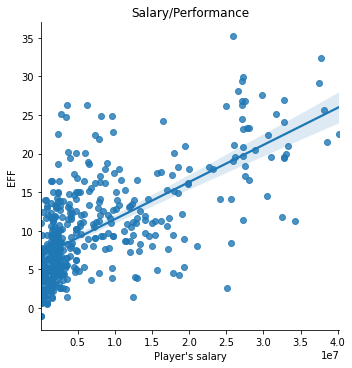

In [0]:
player_salary_eff=pd.merge(player_per,player_salary,left_on='PLAYER_NAME',right_on='Player',how='inner')

import seaborn as sns

ax = sns.lmplot('2019-20','EFF',data=player_salary_eff)
ax.set(xlabel="Player's salary", ylabel='EFF', title='Salary/Performance');

### Analysis: Prediction of teams that enter playoffs

In [0]:
# add binary variable for off season teams, 1=playoffs team, 0=not
stats_2018_pre['playoffs'] = np.array([0,1,0,0,0,0,1,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,0])
stats_2017_pre['playoffs'] = np.array([0,1,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,0,1,0,0])
stats_2016_pre['playoffs'] = np.array([1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0])
stats_2015_pre['playoffs'] = np.array([1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1])
stats_2014_pre['playoffs'] = np.array([1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0])
stats_2013_pre['playoffs'] = np.array([1,0,0,0,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,1,0,1])
stats_2012_pre['playoffs'] = np.array([1,1,0,0,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0])
stats_2011_pre['playoffs'] = np.array([1,1,0,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0])
stats_2010_pre['playoffs'] = np.array([1,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0])


#Merged the data from 2016 to 2018
frames = [stats_2018_pre, stats_2017_pre, stats_2016_pre,stats_2015_pre,stats_2014_pre,stats_2013_pre,
          stats_2012_pre, stats_2011_pre, stats_2010_pre]
stats_18to10_pre = pd.concat(frames)
stats_18to10_pre =stats_18to10_pre.iloc[:,np.r_[7,8,0:7,9]]

#normalization
from sklearn.preprocessing import minmax_scale
stats_18to10_pre['PTS'] = minmax_scale(stats_18to10_pre['PTS'], feature_range=(0,1))
stats_18to10_pre['AST'] = minmax_scale(stats_18to10_pre['AST'], feature_range=(0,1))
stats_18to10_pre['REB'] = minmax_scale(stats_18to10_pre['REB'], feature_range=(0,1))

stats_18to10_pre.head()

,TEAM_ID,NICKNAME,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WINRATE,playoffs
0,1610612737,Hawks,0.846619,0.451780,0.751817,0.350976,0.631787,0.717268,0.353659,0
1,1610612738,Celtics,0.816099,0.465829,0.806378,0.363012,0.668312,0.596774,0.597561,1
2,1610612739,Cavaliers,0.562160,0.444756,0.786195,0.352024,0.217177,0.449715,0.231707,0
3,1610612740,Pelicans,0.913919,0.474561,0.757463,0.344073,0.728529,0.810247,0.402439,0
4,1610612741,Bulls,0.577028,0.454183,0.788293,0.349183,0.313919,0.467742,0.268293,0


Predicting using logistic regression.

In [0]:
# Split arrays into train and test subsets which will be randomly selected
X_train, X_test, y_train, y_test = train_test_split(stats_18to10_pre.iloc[:,2:9], stats_18to10_pre['playoffs'], random_state=123)  

# Confirm the **75%–25% train-test split** 
print(X_train.size, 'items --', X_train.size/(X_train.size + X_test.size) * 100)
print(X_test.size, 'items --', X_test.size/(X_train.size + X_test.size) * 100)

1414 items -- 74.81481481481481
476 items -- 25.185185185185183


Here we will run the regression for 19-20 season data, then predict the top 8 teams,west and east conference, and showing which teams has higher probability to enter playoffs.


In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
glm1 = LogisticRegression()
glm1.fit(X_train, y=y_train)
#glm prediction
expected = y_test
predicted = glm1.predict(X_test)

#check model accuracy
score = glm1.score(X_test, y_test)
print('Model Accuracy: ', round(score,5))

#predict 19-20 season
predict1 = glm1.predict_proba(stats_2019_pre.iloc[:,2:9])[:,1]
#show the y=1 probability
stats_2019_pre['prob']= predict1

eastlist= ['Bucks','Hawks','Celtics','Cavaliers','Bulls','Heat','Bucks','Nets','Knicks','Magic','Pacers','76ers','Raptors','Wizards','Pistons','Hornets']
westlist= ['Pelicans','Mavericks','Nuggets','Warriors','Rockets','Clippers','Lakers','Timberwolves','Suns','Trail Blazers','Kings','Spurs','Thunder','Jazz','Grizzlies']

#display teams with top 16 highest probability to enter playoffs
playoff19p = stats_2019_pre.sort_values(by='prob',ascending=False).reset_index(drop=True)[['NICKNAME','prob']]
w19p = playoff19p[playoff19p['NICKNAME'].isin(westlist)].head(8).reset_index(drop=True)
e19p = playoff19p[playoff19p['NICKNAME'].isin(eastlist)].head(8).reset_index(drop=True)

Accuracy:  0.88235


In [0]:
# Top 8 team in Western Conference
w19p

,NICKNAME,prob
0,Lakers,0.888399
1,Clippers,0.818211
2,Nuggets,0.791174
3,Rockets,0.788414
4,Mavericks,0.745363
5,Jazz,0.701613
6,Thunder,0.667978
7,Grizzlies,0.567195


In [0]:
# Top 8 team in Eastern Conference
e19p

,NICKNAME,prob
0,Bucks,0.950078
1,Raptors,0.815245
2,Celtics,0.804269
3,Heat,0.761725
4,76ers,0.700722
5,Pacers,0.674332
6,Nets,0.471358
7,Magic,0.404172


Visualized Map of Team Entering Playeoffs Counts

From 2010 to 2019

In [0]:
map_data=pd.read_html("https://en.wikipedia.org/wiki/National_Basketball_Association")[2]

map_data.columns=map_data.columns.droplevel(1)
#map_data.head()
map_data.drop(map_data.index[15],inplace=True)
map_data.reset_index(drop=True, inplace=True)
map_data['Coordinates']=map_data['Coordinates'].str.replace('.+/','')
map_data['latitude']=map_data['Coordinates'].str.extract('(\d{2}.\d+)')
map_data['longitude']=map_data['Coordinates'].str.extract('(\d{2,3}.\d+.W)')
map_data['longitude']=map_data['longitude'].str.replace('.W','')
map_data['longitude']=pd.to_numeric(map_data['longitude'])
map_data['latitude']=pd.to_numeric(map_data['latitude'])

map_data['temporary']=map_data['longitude']*2
map_data['longitude']=map_data['longitude']-map_data['temporary']
map_data.drop(['Unnamed: 8_level_0','temporary'],axis=1,inplace=True)
map_data['NICKNAME']=map_data['Team'].str.rsplit(expand=True)[1]
map_data['NICKNAME'][2]='Knicks'
map_data['NICKNAME'][17]='Thunder'
map_data['NICKNAME'][18]='Trail Blazers'
map_data['NICKNAME'][20]='Warriors'
map_data['NICKNAME'][21]='Clippers'
map_data['NICKNAME'][22]='Lakers'
map_data['NICKNAME'][28]='Pelicans'
map_data['NICKNAME'][29]='Spurs'

map_with_playoff=pd.merge(map_data,stats_18to10_pre,right_on='NICKNAME',left_on='NICKNAME',how='inner')
map_with_playoff_2=pd.DataFrame(map_with_playoff.groupby('NICKNAME')['playoffs'].sum())
#map_with_playoff_2.sort_values('playoffs',ascending=False).head(3)

map_with_playoff_3=pd.merge(map_data,map_with_playoff_2,left_on='NICKNAME',right_index=True,how='inner')
#map_with_playoff_3.head(3)

import plotly.express as px
fig = px.scatter_mapbox(map_with_playoff_3, lat="latitude", lon="longitude", hover_name="Team", hover_data=["City, State","Division"],
                        color_discrete_sequence=['red'], zoom=3, height=300,opacity=0.6,size="playoffs")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Prediction of the MVP

Here, we'll use player performance from previous season, to predict the mvp of year 2020.

In [0]:
#2018-19: Giannis Antetokounmpo (Greece)

#Use the data in only season 2018
games_s18 = games[games['SEASON'] == 2018]['GAME_ID']
games_details_s18 = games_details[games_details.GAME_ID.isin(games_s18)]

#Filter the column we need
player_statistics_18 = games_details_s18.groupby(by = 'PLAYER_NAME', as_index=False)['MIN','REB','AST','STL','BLK','PTS'].mean()

player_per_18= games_details_s18.groupby(by = 'PLAYER_NAME', as_index=False)['PTS','REB','AST','STL','BLK','FGA','FGM','FTA','FTM','TO'].mean()
player_per_18['EFF'] = (player_per_18['PTS']+player_per_18['REB']+player_per_18['AST']+player_per_18['STL']+player_per_18['BLK'])-(player_per_18['FGA']-player_per_18['FGM'])-(player_per_18['FTA']-player_per_18['FTM']) - player_per_18['TO']
#select top 10 eff players
player18_mvp_candidate=player_per_18.sort_values(by='EFF',ascending=False).head(10)
player18_mvp_candidate.reset_index(drop=True)
player18_mvp_candidate['MVP']=[1,0,0,0,0,0,0,0,0,0]
player18_mvp_candidate

,PLAYER_NAME,PTS,REB,AST,STL,BLK,FGA,FGM,FTA,FTM,TO,EFF,MVP
213,Giannis Antetokounmpo,27.211111,12.400000,5.711111,1.277778,1.577778,17.222222,9.755556,9.733333,6.877778,3.588889,34.266667,1
31,Anthony Davis,25.533333,11.850000,3.766667,1.633333,2.416667,18.033333,9.300000,7.716667,6.083333,2.016667,32.816667,0
267,James Harden,34.913978,6.580645,7.419355,2.043011,0.763441,23.956989,10.473118,10.580645,9.236559,5.000000,31.892473,0
307,Joel Embiid,26.346154,12.948718,3.602564,0.730769,1.884615,18.102564,8.666667,9.730769,7.833333,3.576923,30.602564,0
351,Karl-Anthony Towns,24.073171,12.073171,3.219512,0.841463,1.621951,16.829268,8.682927,5.853659,4.890244,3.036585,29.682927,0
460,Nikola Jokic,20.500000,10.867347,7.275510,1.306122,0.704082,15.275510,7.806122,4.561224,3.765306,3.061224,29.326531,0
393,LeBron James,26.440678,8.203390,7.949153,1.271186,0.576271,19.067797,9.762712,7.389831,4.966102,3.491525,29.220339,0
514,Russell Westbrook,22.935897,10.923077,10.730769,1.884615,0.461538,20.307692,8.589744,6.115385,4.089744,4.461538,28.730769,0
364,Kevin Durant,26.446809,6.202128,5.627660,0.776596,1.031915,17.851064,9.308511,6.712766,5.946809,2.968085,27.808511,0
352,Kawhi Leonard,27.218391,7.701149,3.482759,1.747126,0.482759,19.034483,9.367816,7.666667,6.551724,2.275862,27.574713,0


Predicting using logistic regression.

In [0]:
#glm for mvp
glm2 = LogisticRegression()
glm2.fit(player18_mvp_candidate.iloc[:,1:12], player18_mvp_candidate['MVP'])

#Fit in the model
MVP1920_Cadidate=player_per.sort_values('EFF',ascending=False).head(10)
mvp_glm_19 = glm2.predict(MVP1920_Cadidate.iloc[:,1:])

#Fit in the model for prob prediction
mvp_glm_prob = glm2.predict_proba(MVP1920_Cadidate.iloc[:,1:])[:,1]

#Final data
MVP1920_Cadidate['MVP'] = mvp_glm_19
MVP1920_Cadidate['MVP Prob'] = mvp_glm_prob
MVP1920_Cadidate

,PLAYER_NAME,PTS,REB,AST,STL,BLK,FGA,FGM,FTA,FTM,TO,EFF,MVP,MVP Prob
212,Giannis Antetokounmpo,29.789474,13.701754,5.684211,1.052632,1.070175,19.754386,11.000000,10.017544,6.315789,3.649123,35.192982,1,0.839138
263,James Harden,34.950820,6.311475,7.344262,1.721311,0.868852,22.819672,10.098361,11.819672,10.131148,4.377049,32.409836,0,0.095906
344,Karl-Anthony Towns,25.717949,10.384615,4.333333,0.974359,1.256410,17.205128,8.769231,6.179487,4.974359,3.076923,29.948718,0,0.011060
401,Luka Doncic,27.980769,9.442308,8.403846,1.038462,0.192308,19.788462,9.115385,8.980769,6.865385,4.346154,29.923077,0,0.033866
29,Anthony Davis,25.381818,9.181818,3.290909,1.454545,2.436364,17.363636,8.781818,8.072727,6.781818,2.418182,29.454545,0,0.006160
392,LeBron James,24.783333,7.566667,10.350000,1.200000,0.433333,19.016667,9.433333,5.433333,3.800000,3.900000,29.216667,0,0.005572
470,Nikola Jokic,20.253968,9.952381,6.603175,1.238095,0.666667,14.746032,7.888889,4.111111,3.349206,2.936508,28.158730,0,0.003333
107,Damian Lillard,28.807018,4.298246,7.701754,0.929825,0.350877,19.859649,9.157895,7.508772,6.684211,2.947368,27.614035,0,0.000651
347,Kawhi Leonard,26.326531,7.285714,5.122449,1.857143,0.591837,19.877551,9.163265,6.653061,5.959184,2.795918,26.979592,0,0.000286
298,Joel Embiid,22.978261,11.500000,3.000000,0.826087,1.326087,15.565217,7.391304,8.565217,6.978261,3.065217,26.804348,0,0.003250


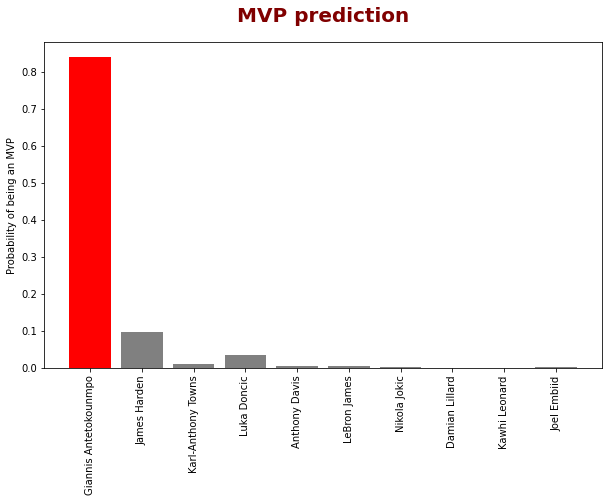

In [0]:
colors = ['grey' if (x < max(MVP1920_Cadidate['MVP Prob'])) else 'red' for x in MVP1920_Cadidate['MVP Prob'] ]
plt.figure(figsize=(10,6))
plt.bar(x=MVP1920_Cadidate['PLAYER_NAME'], height=MVP1920_Cadidate['MVP Prob'], color=colors)
plt.ylabel('Probability of being an MVP')
plt.title('MVP prediction', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'maroon'}, pad=20)
plt.xticks(rotation='vertical');

### Prediction of the champion team

We will use same technique as above, using historical performance to predict which team has higher chance to be the champion of year 2020.



In [0]:
#Adding binary variables for champion team from 18-19 to 10-11
stats_2018_pre['champion'] = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0])
stats_2017_pre['champion'] = np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
stats_2016_pre['champion'] = np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
stats_2015_pre['champion'] = np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
stats_2014_pre['champion'] = np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
stats_2013_pre['champion'] = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0])
stats_2012_pre['champion'] = np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
stats_2011_pre['champion'] = np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
stats_2010_pre['champion'] = np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

stats_2019_chm = stats_2019_pre.iloc[:,:9]
#Merge the data
frames = [stats_2018_pre, stats_2017_pre, stats_2016_pre,stats_2015_pre,stats_2014_pre,stats_2013_pre,
          stats_2012_pre, stats_2011_pre, stats_2010_pre]
stats_18to10_chm = pd.concat(frames)
stats_18to10_chm = stats_18to10_chm.iloc[:,np.r_[7,8,0:7,10]]

#normalization
from sklearn.preprocessing import minmax_scale
stats_18to10_chm['PTS'] = minmax_scale(stats_18to10_chm['PTS'], feature_range=(0,1))
stats_18to10_chm['AST'] = minmax_scale(stats_18to10_chm['AST'], feature_range=(0,1))
stats_18to10_chm['REB'] = minmax_scale(stats_18to10_chm['REB'], feature_range=(0,1))

Predicting using Logistic regression.

In [0]:
# Split data into train and test subsets 
X_train2, X_test2, y_train2, y_test2 = train_test_split(stats_18to10_chm.iloc[:,2:9], 
                                                        stats_18to10_chm['champion'], random_state=1234)  
# Confirm the **75%–25% train-test split** 
print(X_train2.size, 'items --', X_train2.size/(X_train2.size + X_test2.size) * 100)
print(X_test2.size, 'items --', X_test2.size/(X_train2.size + X_test2.size) * 100)

1414 items -- 74.81481481481481
476 items -- 25.185185185185183


In [0]:
#logistic regression
glm3 = LogisticRegression()
glm3.fit(X_train2, y=y_train2)
#glm prediction
expected = y_test2
predicted2 = glm3.predict(X_test2)
#check model accuracy
score2 = glm3.score(X_test2, y_test2)
print('Accuracy: ', round(score2,5))

#show the y=1 probability
glm3_prob = glm3.predict_proba(stats_2019_chm.iloc[:,2:9])[:,1]
stats_2019_chm['prob']= glm3_prob
#display probability of team being champion 
stats_2019_chm.sort_values(by='prob',ascending=False).head(10)

Accuracy:  0.94118


,TEAM_ID,NICKNAME,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WINRATE,prob
12,1610612749,Bucks,1.000000,0.481650,0.737433,0.361800,0.876682,1.000000,0.866667,0.061722
10,1610612747,Lakers,0.711008,0.485518,0.727453,0.356680,0.869739,0.418119,0.778226,0.052451
6,1610612743,Nuggets,0.502552,0.471228,0.775151,0.355147,0.922754,0.246429,0.680200,0.046573
11,1610612748,Heat,0.620398,0.471900,0.774874,0.382430,0.830206,0.281765,0.640712,0.044039
24,1610612761,Raptors,0.600025,0.458647,0.795859,0.374205,0.772869,0.326750,0.698661,0.043667
3,1610612740,Pelicans,0.784936,0.463683,0.731783,0.374100,0.958251,0.475433,0.433333,0.042845
26,1610612763,Grizzlies,0.591310,0.471173,0.763173,0.345774,0.998192,0.417565,0.481090,0.042531
17,1610612754,Pacers,0.413319,0.477674,0.779670,0.362438,0.877024,0.082687,0.597330,0.040727
19,1610612756,Suns,0.563848,0.464226,0.817769,0.348491,1.000000,0.115791,0.396013,0.040347
9,1610612746,Clippers,0.804136,0.465903,0.790259,0.367691,0.576594,0.584352,0.679088,0.039284


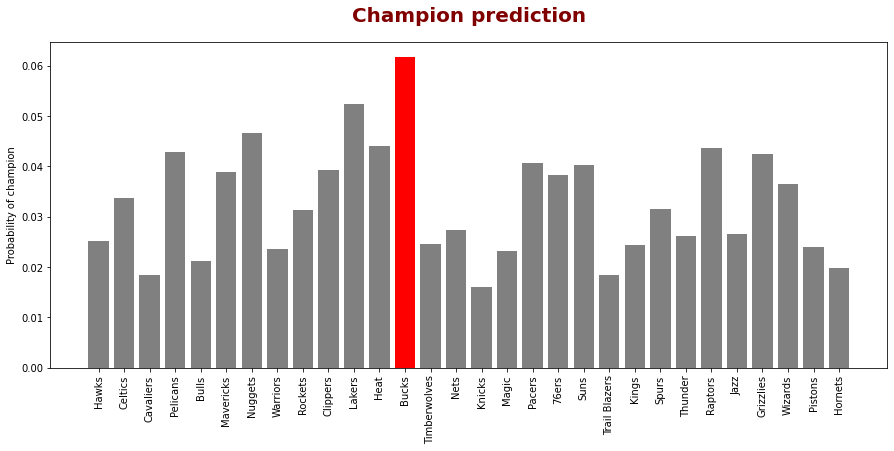

In [0]:
colors = ['grey' if (x < max(stats_2019_chm['prob'])) else 'red' for x in stats_2019_chm['prob'] ]
plt.figure(figsize=(15,6))
plt.bar(x=stats_2019_chm['NICKNAME'], height=stats_2019_chm['prob'], color=colors)
plt.ylabel('Probability of champion')
plt.title('Champion prediction', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'maroon'}, pad=20)
plt.xticks(rotation='vertical');

### Prediction of the rookie of the year

In [0]:
#Prepare data
player_list=['Zion Williamson','RJ Barrett','Ja Morant','Rui Hachimura','Cameron Reddish','KZ Okpala','Bruno Fernando','Jarret Culver','Nickeil Alexander-Walker'
              ,'Keldon Johnson','Nassir Little','Romeo Langford','Sekou Doumbouya','Darius Garland',"De'Andre Hunter",'Daniel Gafford','Bol Bol','Jaxson Hayes'
              ,'Michael Porter Jr.','Coby White','PJ Washington','Tyler Herro','Goga Bitzdze','Kevin Porter','Mifiondu Kabengele','Matt Thomas','Bardon Clarke',
             'Carsen Edwards','Grant Williams','Kendrick Nunn','Ty Jerome','Kyle Guy','Matisse Thybulle','Eric Paschall']
rookie_list = player_per[player_per['PLAYER_NAME'].isin(player_list)]

Predicting using the EFF as measurement.

In [0]:
#Simply predict the rookie of the year by EFF ranking
rookie_list.sort_values('EFF', ascending=False).head(3).reset_index(drop=True)[['PLAYER_NAME','EFF']]

,PLAYER_NAME,EFF
0,Zion Williamson,22.789474
1,Ja Morant,17.964286
2,Rui Hachimura,14.641026
